# Classification of NBA players

## Loading the Data

First, we load the standard packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

I have downloaded the data from https://www.basketball-reference.com

In [2]:
from sklearn import linear_model, preprocessing

sstat = pd.read_csv('playertotal.csv',index_col=1)
ss = sstat.fillna(0)
print(ss)

                                  Rk Pos  Age   Tm   G  GS    MP   FG   FGA  \
Player                                                                        
Russell Westbrook\westbru01        1  PG   28  OKC  81  81  2802  824  1941   
James Harden\hardeja01             2  PG   27  HOU  81  81  2947  674  1533   
Isaiah Thomas\thomais02            3  PG   27  BOS  76  76  2569  682  1473   
Anthony Davis\davisan02            4   C   23  NOP  75  75  2708  770  1526   
Karl-Anthony Towns\townska01       5   C   21  MIN  82  82  3030  802  1480   
Damian Lillard\lillada01           6  PG   26  POR  75  75  2694  661  1488   
DeMar DeRozan\derozde01            7  SG   27  TOR  74  74  2620  721  1545   
Stephen Curry\curryst01            8  PG   28  GSW  79  79  2638  675  1443   
LeBron James\jamesle01             9  SF   32  CLE  74  74  2794  736  1344   
DeMarcus Cousins\couside01        10   C   26  TOT  72  72  2465  647  1432   
Andrew Wiggins\wiggian01          11  SF   21  MIN  

## Trying a Logistic Regression Classifier

In [3]:
ytr=ss['Pos']
xtr=ss[['FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS▼']]

In [4]:
logreg = linear_model.LogisticRegression(verbose=5, #multi_class='multinomial', 
                                         solver='liblinear', max_iter=100)
logreg.fit(xtr,ytr)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

Now try the new season stats

In [5]:
sstat8 = pd.read_csv('2018total.csv',index_col=1)
ss8 = sstat8.fillna(0)

In [6]:
yts=ss8['Pos']
xts=ss8[['FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS▼']]

In [7]:
yhat = logreg.predict(xtr)
acc = np.mean(yhat == ytr)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.656379


In [8]:
nprt = 10
Ierr = np.where(ytr != yhat)[0]
print("The number of mismatch is",Ierr.shape[0])
for i in range(nprt):              
    ind = Ierr[i]    
    print(xtr.index[ind])  
    title = 'true={0:s} est={1:s}'.format(ytr[ind], yhat[ind])
    print(title)

The number of mismatch is 167
DeMar DeRozan\derozde01
true=SG est=SF
LeBron James\jamesle01
true=SF est=C
Andrew Wiggins\wiggian01
true=SF est=SG
Giannis Antetokounmpo\antetgi01
true=SF est=C
Carmelo Anthony\anthoca01
true=SF est=SG
Harrison Barnes\barneha02
true=PF est=SG
Tobias Harris\harrito02
true=PF est=SF
Blake Griffin\griffbl01
true=PF est=SF
Paul Millsap\millspa01
true=PF est=SF
LaMarcus Aldridge\aldrila01
true=PF est=C


0.7142857142857143
0.39325842696629215
0.845360824742268
0.41237113402061853
0.8865979381443299
[[ 0.887  0.072  0.     0.     0.022  0.019]
 [ 0.309  0.412  0.     0.01   0.18   0.095]
 [ 0.     0.     1.     0.     0.     0.   ]
 [ 0.01   0.031  0.     0.845  0.022  0.086]
 [ 0.052  0.196  0.     0.031  0.393  0.257]
 [ 0.021  0.041  0.     0.155  0.101  0.714]]


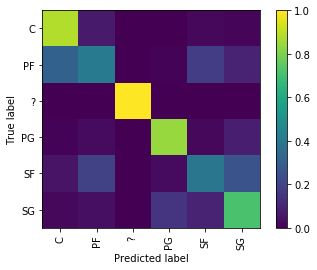

In [9]:
#print(ytr_names)
from sklearn.metrics import confusion_matrix
C = confusion_matrix(ytr,yhat)
a=np.where((ytr=='SG')&(yhat=='SG'))[0]
b=np.where((ytr=='SG'))[0]
print(a.shape[0]/b.shape[0])
a=np.where((ytr=='SF')&(yhat=='SF'))[0]
b=np.where((ytr=='SF'))[0]
print(a.shape[0]/b.shape[0])
a=np.where((ytr=='PG')&(yhat=='PG'))[0]
b=np.where((ytr=='PG'))[0]
print(a.shape[0]/b.shape[0])
a=np.where((ytr=='PF')&(yhat=='PF'))[0]
b=np.where((ytr=='PF'))[0]
print(a.shape[0]/b.shape[0])
a=np.where((ytr=='C')&(yhat=='C'))[0]
b=np.where((ytr=='C'))[0]
print(a.shape[0]/b.shape[0])
# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
x=[0,1,2,3,4,5]
y=[0,1,2,3,4,5]
ygroup_labels = ['C', 'PF','?','PG','SF','SG']  
xgroup_labels = ['C', 'PF','?','PG','SF','SG'] 
plt.xticks(x, xgroup_labels, rotation=90)  
plt.yticks(y, ygroup_labels, rotation=0)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

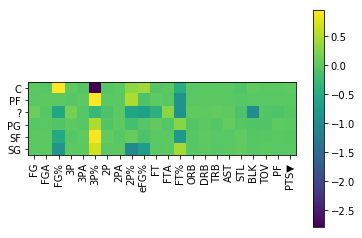

In [10]:
W = logreg.coef_
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
y=[0,1,2,3,4,5]
ygroup_labels = ['C', 'PF','?','PG','SF','SG']  
xgroup_labels = ['FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS▼']  
plt.xticks(x, xgroup_labels, rotation=90)  
plt.yticks(y, ygroup_labels, rotation=0)  
#print(W)
plt.imshow(W, interpolation='none')
plt.colorbar()

In [11]:
from sklearn import svm

# Create a classifier: a support vector classifier
svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)

In [12]:
svc.fit(xtr,ytr)
yhat_tr = svc.predict(xtr)
acc = np.mean(yhat_tr == ytr)
print('Accuaracy = {0:f}'.format(acc))

[LibSVM]Accuaracy = 0.995885


In [13]:
Ierr = np.where(yhat_tr != ytr)[0]
nprt = 2
print("The number of mismatch is",Ierr.shape[0])
for i in range(nprt):              
    ind = Ierr[i]    
    print(xtr.index[ind])  
    title = 'true={0:s} est={1:s}'.format(ytr[ind], yhat_tr[ind])
    print(title)

The number of mismatch is 2
John Lucas III\lucasjo02
true=PG est=SG
Ben Bentil\bentibe01
true=PF est=SG


In [14]:
yhat_ts = svc.predict(xts)
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.266094


In [15]:
Ierr = np.where(yhat_ts != yts)[0]
nprt = 324
print("The number of mismatch is",Ierr.shape[0])
for i in range(nprt):              
    ind = Ierr[i]    
    print(xts.index[ind])  
    title = 'true={0:s} est={1:s}'.format(yts[ind], yhat_ts[ind])
    print(title)

The number of mismatch is 342
LeBron James\jamesle01
true=PF est=SG
DeMarcus Cousins\couside01
true=C est=SG
Giannis Antetokounmpo\antetgi01
true=PF est=SG
Damian Lillard\lillada01
true=PG est=SG
Kyrie Irving\irvinky01
true=PG est=SG
Russell Westbrook\westbru01
true=PG est=SG
Anthony Davis\davisan02
true=PF est=SG
LaMarcus Aldridge\aldrila01
true=PF est=SG
Kevin Durant\duranke01
true=SF est=SG
Kristaps Porzingis\porzikr01
true=PF est=SG
Stephen Curry\curryst01
true=PG est=SG
Karl-Anthony Towns\townska01
true=C est=SG
Kemba Walker\walkeke02
true=PG est=SG
T.J. Warren\warretj01
true=SF est=SG
Joel Embiid\embiijo01
true=C est=SG
Khris Middleton\middlkh01
true=SF est=SG
Kevin Love\loveke01
true=C est=SG
Jrue Holiday\holidjr01
true=PG est=SG
Marc Gasol\gasolma01
true=C est=SG
Andrew Wiggins\wiggian01
true=SF est=SG
Harrison Barnes\barneha02
true=PF est=SG
Paul George\georgpa01
true=SF est=SG
Dennis Schroder\schrode01
true=PG est=SG
Nikola Vucevic\vucevni01
true=C est=SG
Tobias Harris\harrit